# ObsID : 0945040138, SRCNUM : 14, Instru : EPN
Not on Simbad.

## ESASky

https://sky.esa.int/esasky/?target=53.822291666666665%20-27.52513888888889&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033517.2-273130
- IAU name : 4XMM J033517.2-273130
- RA : 03h 35m 17.272s
- DEC : -27° 31' 30.54"

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "cstat"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files
Spectrum, Background, Response, Auxiliary response.

In [3]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp_cstat.fits')[0])


1 spectrum  in use
 
Spectral Data File: ObsID0945040138_SRCNUM14_EPN_spectrum_grp_cstat.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  6.960e-03 +/- 1.449e-03 (59.9 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-52
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 5941 sec
 Using fit statistic: cstat
 Using Background File                ObsID0945040138_SRCNUM14_EPN_background_spectrum.fits
  Background Exposure Time: 5941 sec
 Using Response (RMF) File            ObsID0945040138_SRCNUM14_EPN.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945040138_SRCNUM14_EPN.arf



In [4]:
n_cts = 6.960e-03*5941

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 41.34936

The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.


## Plot spectrum

In [4]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot("data")
spec.ignore("**-0.2 12.0-**")

     7 channels (1-7) ignored in spectrum #     1
     1 channels (52) ignored in spectrum #     1



(-0.5, 856.5, 661.5, -0.5)

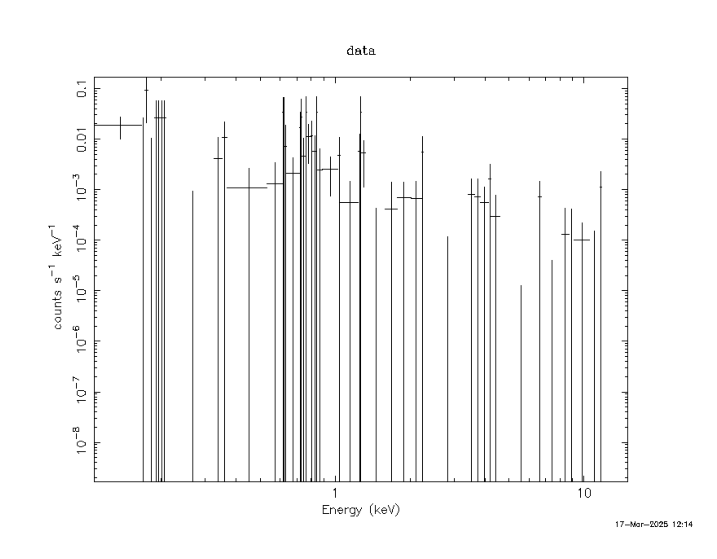

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum2.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [5]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : C-Statistic              4.301838e+06     using 44 bins.

Te

(-0.5, 856.5, 659.5, -0.5)

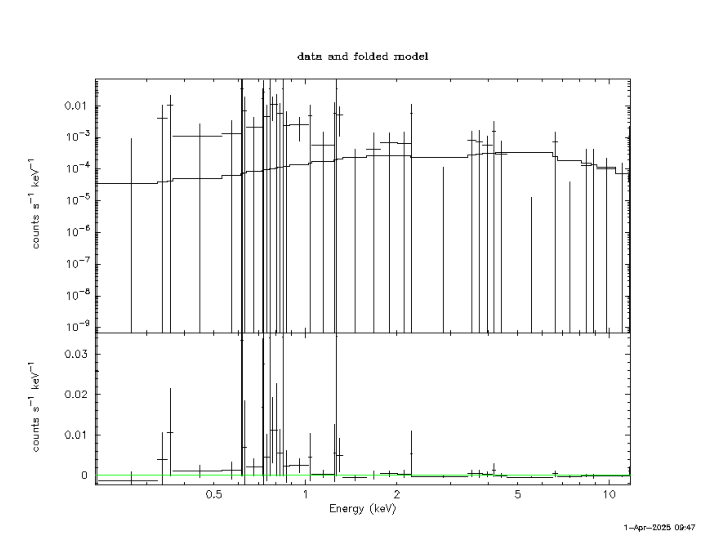

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody2.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model (Second best fit)

In [7]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.029848e+06     using 44 bins.

Test statistic : Chi-Squared              2.348133e+10     using 44 bins.
 Null hypothesis probability of 0.000000e+00 with 41 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
564017       196340       -3      0.170194       199.338      0.459155
135451       257027       -1     0.0752904       199.357     0.0916194
51994        253613       -1     0.0325499       199.361     0.0314450


(-0.5, 856.5, 660.5, -0.5)

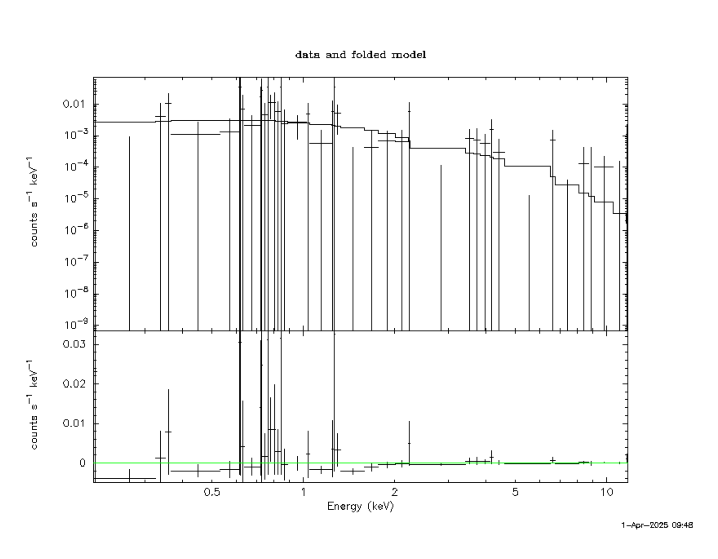

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss2.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model (Best fit)

In [9]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : C-Statistic                447442.6     using 44 bins.

Test statistic : Chi-Squared              4.331905e+09     using 44 bins.
 Null hypothesis probability of 0.000000e+00 with 41 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        5:norm
209127       137452       -3      0.247459       35.2861     

(-0.5, 857.5, 656.5, -0.5)

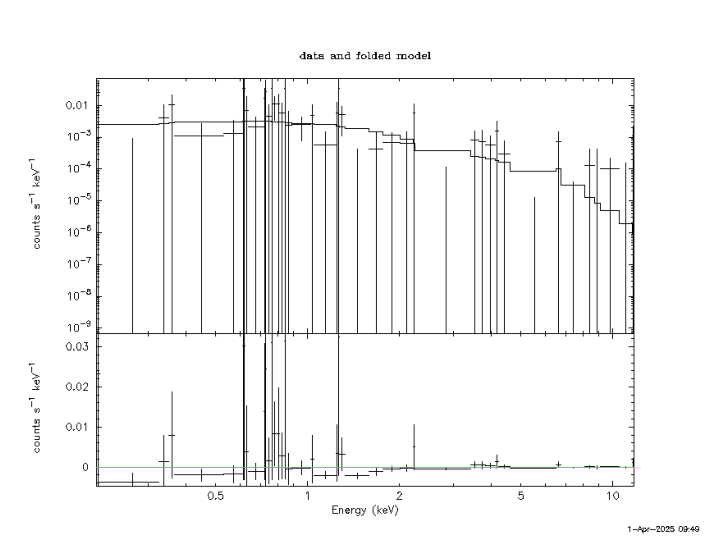

In [10]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec2.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [11]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              2.486590e+06     using 44 bins.

Test statistic : Chi-Squared              1.314847e+11     using 44 bins.
 Null hypothesis probability of 0.000000e+00 with 41 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
377131       631104       -1      0.372950       7.70756     0.0699277
97.8759      1.0266e+06   -2       1355.41       2.11696       65.1616
97.5666      0.264721      1       1340.31       2.05733       74.424

(-0.5, 855.5, 657.5, -0.5)

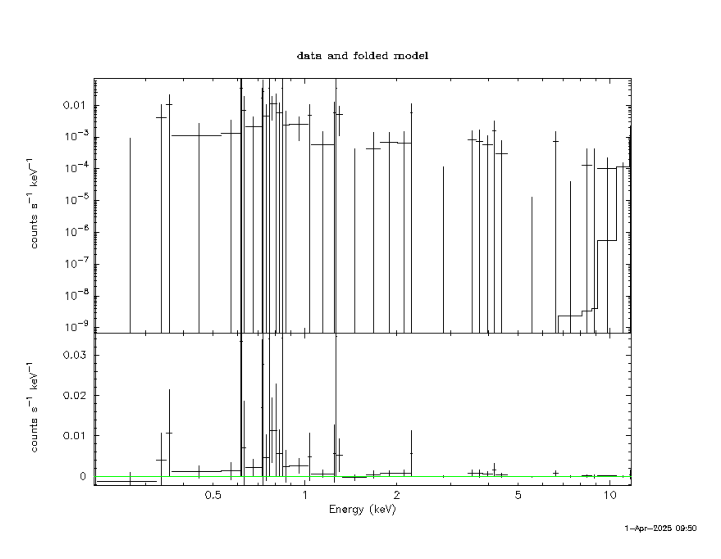

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw2.png')[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :**

- RA = 53.8219681°
- DEC = -27.5251507°

53.82 -27.53

**Column density :** nH = 1*10^20 cm^-2

In [16]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print()
print(color.BOLD+"bremss (Second best fit)"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print()
print(color.BOLD+"apec (Best fit)"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print()
print(color.BOLD+"powerlaw"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")

The different models give a column density of :

bbody
(tbabs) : 96743932676825.22

bremss (Second best fit)
(tbabs) : 2.4208745048452343e+20

apec (Best fit)
(tbabs) : 3.412654318606745e+20

powerlaw
(tbabs) : 3.3080770100945536e+25


## Flux
### X-ray flux
- X-ray flux of the best-fitting model ``Apec`` with C-statistic = 54.4515 using 44 bins: **1.0759e-13 ergs/cm^2/s**.
- X-ray flux of the second best-fitting model ``Bremss`` with C-statistic = 54.9269 using 44 bins: **1.1895e-13 ergs/cm^2/s**.

In [2]:
Flux = 1.0759e-13 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END)
print(f"Apec : F_x-ray = {Flux} ergs/cm^2/s")

X-ray flux : 
Apec : F_x-ray = 1.0759e-13 ergs/cm^2/s


### Optical flux
No GAIA information, so we use the lower limit of 20.7 mag.

In [3]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G = 20.7

F = F_optical(G)

print(color.BOLD+"Optical flux (lower limit) : "+color.END+f"F_optical = {F} ergs/cm^2/s")

Optical flux (lower limit) : F_optical = 5.510478332622621e-14 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [19]:
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END+f"F_x-ray/F_optical = {Flux/F}")

X-ray flux / Optical flux ratio : F_x-ray/F_optical = 1.9524620823396708


## Luminosity
No distance or parallax data is available on ESASky.

In [4]:
# For a star in the milky way : d=[1 pc - 30 kpc]
d_pc = 1 # Distance en pc
d_kpc = 30 # Distance en kpc

d1_cm = d_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_pc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1 = 4*np.pi*Flux*(d1_cm)**2 # erg/s
L2 = 4*np.pi*Flux*(d2_cm)**2 # erg/s

print(color.BOLD+"Luminosity of a galactic source with d = [1 pc - 30 kpc] :"+color.END)
print(f"Apec : F_x-ray = [{L1}, {L2}] erg/s")
print()

# For a galaxy : d=[1 Mpc - 10 Gpc]
d_Mpc = 1 # Distance en Mpc
d_Gpc = 10 # Distance en Gpc

d1_cm = d_Mpc*3.0857*10**24 # Distance en cm, avec 1 pc = 3.0857*10^18 cm
d2_cm = d_Gpc*3.0857*10**27 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L1 = 4*np.pi*Flux*(d1_cm)**2 # erg/s
L2 = 4*np.pi*Flux*(d2_cm)**2 # erg/s


print(color.BOLD+"Luminosity of an extragalactic source with d = [1 Mpc - 10 Gpc] :"+color.END)
print(f"Apec : F_x-ray = [{L1}, {L2}] erg/s")

Luminosity of a galactic source with d = [1 pc - 30 kpc] :
Apec : F_x-ray = [1.287327872798274e+25, 1.287327872798274e+31] erg/s

Luminosity of an extragalactic source with d = [1 Mpc - 10 Gpc] :
Apec : F_x-ray = [1.2873278727982741e+37, 1.287327872798274e+45] erg/s


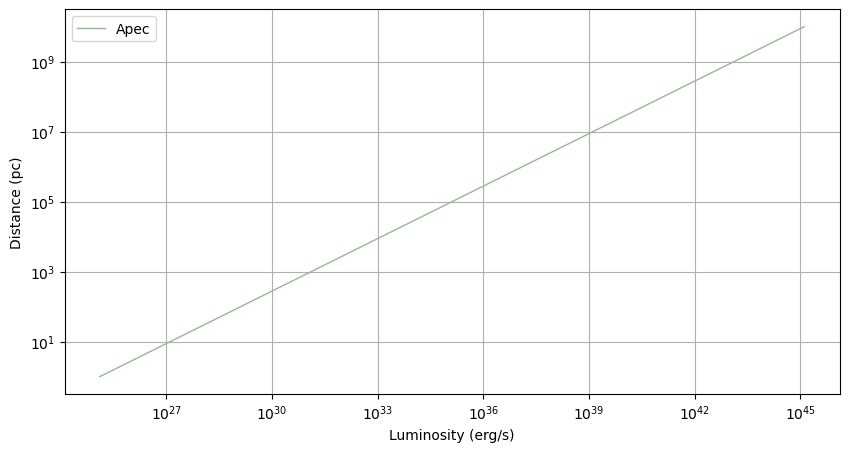

In [5]:
D_pc = np.arange(1, 10**10, 1000)

d_cm = D_pc*3.0857*10**18 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
L = 4*np.pi*Flux*(d_cm)**2 # erg/s

plt.figure(figsize=[10,5])
plt.plot(L,D_pc, lw=1, color='darkseagreen', label="Apec")
plt.legend(loc='best')
plt.xlabel("Luminosity (erg/s)")
plt.ylabel("Distance (pc)")
plt.xscale("log")
plt.yscale("log")
plt.grid()